In [65]:
# Import modules
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [28]:
# Define coordiante reference systems
crs_utm = 32614 # UTM Zone 14
crs_wgs = 4326 # WGS84

In [14]:
# Read spatial data
gdf = gpd.read_file('../datasets/spatial/soil_moisture_surveys/kona_08_jul_2019.csv')
gdf.head(3)


,TimeStamp,Record,Zone,Latitude,Longitude,Moisture,Period,Attenuation,Permittivity,Probe Model,field_11,Display,geometry
0,7/8/19 12:04,1015,ZONE 00078,39.11056,-96.61091,45.02,1.8469,2.5216,30.789,CD659 12cm rods,,3710,None
1,7/8/19 12:04,1016,ZONE 00078,39.11056,-96.61091,45.02,1.8469,2.5216,30.789,CD659 12cm rods,,3710,None
2,7/8/19 12:05,1017,ZONE 00078,39.11056,-96.61091,28.59,1.5564,1.5221,15.659,CD659 12cm rods,,3710,None


In [29]:
## Add Point geometry from lat and long values
points = gpd.points_from_xy(gdf['Longitude'], gdf['Latitude'], crs=crs_wgs)
gdf['geometry'] = points
gdf.head(3)

,TimeStamp,Record,Zone,Latitude,Longitude,Moisture,Period,Attenuation,Permittivity,Probe Model,field_11,Display,geometry
0,7/8/19 12:04,1015,ZONE 00078,39.11056,-96.61091,45.02,1.8469,2.5216,30.789,CD659 12cm rods,,3710,POINT (-96.61091 39.11056)
1,7/8/19 12:04,1016,ZONE 00078,39.11056,-96.61091,45.02,1.8469,2.5216,30.789,CD659 12cm rods,,3710,POINT (-96.61091 39.11056)
2,7/8/19 12:05,1017,ZONE 00078,39.11056,-96.61091,28.59,1.5564,1.5221,15.659,CD659 12cm rods,,3710,POINT (-96.61091 39.11056)


In [59]:
# Conver moisture to float (for some reason it is imported as str)
# type(gdf.loc[0,'Moisture'])
gdf['Moisture'] = gdf['Moisture'].astype(float)

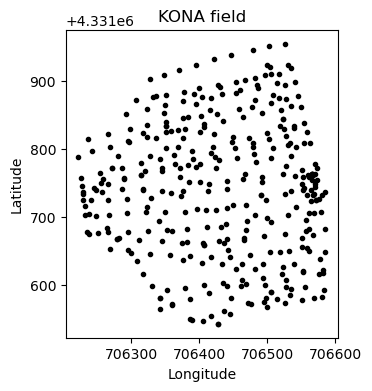

In [60]:
# Inspect spatial data
plt.figure(figsize=(5,4))
plt.title('KONA field')
gdf.plot(ax=plt.gca(), marker='.', color='k')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [61]:
# Convert point coordinates to UTM, so that we can work in meters to compute distances within the field
gdf.to_crs(crs=crs_utm, inplace=True)
gdf.tail(3)


,TimeStamp,Record,Zone,Latitude,Longitude,Moisture,Period,Attenuation,Permittivity,Probe Model,field_11,Display,geometry
355,7/8/19 13:37,105,ZONE 00004,39.11057,-96.61315,41.01,1.7339,1.7514,26.0185,CD659 12cm rods,,4182,POINT (706371.780 4331759.255)
356,7/8/19 13:38,106,[Unspecified Zone],39.11031,-96.61314,40.26,1.7203,1.7317,25.2192,CD659 12cm rods,,4182,POINT (706373.403 4331730.420)
357,7/8/19 13:39,107,ZONE 00010,39.11013,-96.61287,38.80,1.6932,1.5264,23.7587,CD659 12cm rods,,4182,POINT (706397.276 4331711.055)


In [41]:
# Compute distances between all pairs of points
x = gdf['geometry'].x.values
y = gdf['geometry'].y.values


In [70]:
# Compute
dist = []
Z_diff = []
for k in range(gdf.shape[0]):
    dist.append(gdf["geometry"].distance(gdf.loc[k, 'geometry']).values) 
    Z_diff.append((gdf['Moisture'] - gdf.loc[k, 'Moisture'])**2)

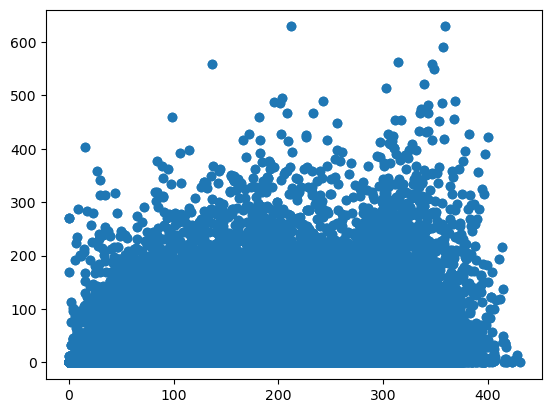

In [71]:
plt.scatter(dist, Z_diff)

In [12]:
expon_variogram = lambda h,par: par[2] + par[0]*(1-np.exp(-3*h/par[1]))


In [45]:
gdf.loc[0,'geometry'] - gdf['geometry']

0                         POINT EMPTY
1                         POINT EMPTY
2                         POINT EMPTY
3      POINT (706565.507 4331763.241)
4      POINT (706565.507 4331763.241)
                    ...              
353    POINT (706565.507 4331763.241)
354    POINT (706565.507 4331763.241)
355    POINT (706565.507 4331763.241)
356    POINT (706565.507 4331763.241)
357    POINT (706565.507 4331763.241)
Name: geometry, Length: 358, dtype: geometry

In [49]:
gdf["geometry"].distance(gdf.loc[0, 'geometry'])

0        0.000000
1        0.000000
2        0.000000
3       34.030449
4       23.828281
          ...    
353    141.526536
354    171.019465
355    193.768173
356    194.887235
357    176.138922
Length: 358, dtype: float64

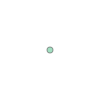

In [48]:
gdf.loc[0, 'geometry']